# Gradient Descent with Linear Regression 
### using Adagrad, RMSProp and Adam
**Author: Abdallah Gaber**

In [6]:
#importing data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

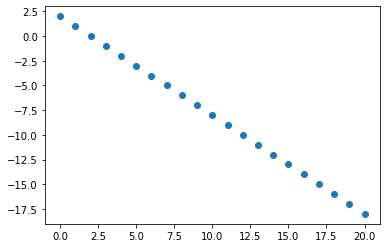

In [3]:
#Creating data-points and plotting them
X = np.array([i for i in range(21)])
y = np.array([-1*x + 2 for x in X])

plt.scatter(X,y)
plt.show()

## Adagrad

In [29]:
def h(X,theta):  #return vector y^
    return X*theta[1]+theta[0]

def errorVector(X,Y,theta): #return vector 
    return h(X,theta)-Y 

def cost(X ,Y,theta):  #return a number 
    return sum(errorVector(X,Y,theta)**2) / (2*len(Y))

def gradientAdagrad(X,Y,lr, theta,Vtheta,epsilon): #calculate gradient and take a step for all thetas  
    Vtheta[0] = Vtheta[0] + (sum(errorVector(X,Y,theta)) / len(Y))**2
    Vtheta[1] = Vtheta[1] + (sum(errorVector(X,Y,theta)*X) / len(Y))**2
    
    theta[0] -= (lr / (Vtheta[0]**(0.5)+epsilon))*(sum(errorVector(X,Y,theta)) / len(Y))
    theta[1] -= (lr / (Vtheta[1]**(0.5)+epsilon))*(sum(errorVector(X,Y,theta)*X) / len(Y))
        
def linearRegressionAdagrad(Xinput,Yinput,alpha,Epoch,batchSize,epsilon):
    
    Xinput = np.array(Xinput)
    Yinput = np.array(Yinput)
    
    theta = [0,0]
    Vtheta = [0,0]
    
    thetaHistory = []
    Thetavalues = []
    costEpoch = []
    costBatch = []
    
    
    for i in range (Epoch):
        for dataIndex in range(0,len(Yinput),batchSize):
            #Split data into batches
            Y = np.array(Yinput[dataIndex:dataIndex+batchSize])
            X = np.array(Xinput[dataIndex:dataIndex+batchSize])
            gradientAdagrad(X,Y,alpha,theta,Vtheta,epsilon)
            costBatch.append(cost(Xinput,Yinput,theta))
            Thetavalues.append(np.array(theta))
            thetaHistory.append(list(theta))
        costEpoch.append(cost(Xinput,Yinput,theta))
        #Draw predicted regression line
        xs = [min(Xinput),max(Xinput)]
        ys = [h(xs[0],theta) , h(xs[1],theta)]
        plt.plot(xs,ys,'#ff0f0f50')
    
    xs = [min(Xinput),max(Xinput)]
    ys = [h(xs[0],theta) , h(xs[1],theta)]
    plt.plot(xs,ys,'#0fff0fff',zorder=9999)
    
    print('Adagrad:')
    print("Final Cost: ", cost(Xinput,Yinput,theta))
    print('R2 Score:',r2_score(y,h(Xinput,theta)))
    
    plt.scatter(Xinput,Yinput,zorder=9999)
    plt.title('Training points & Predicted lines per epoch, (green is final)')
    plt.show()
    FinalH = h(Xinput,theta)
    
    thetaHistory0 = [x[0] for x in thetaHistory]
    thetaHistory1 = [x[1] for x in thetaHistory]
    fig,axis = plt.subplots(1,2)
    axis[0].plot(range(len(thetaHistory0)),thetaHistory0)
    axis[0].set_title('Theta0 change over steps')
    axis[1].plot(range(len(thetaHistory1)),thetaHistory1)
    axis[1].set_title('Theta1 change over steps')
    plt.show()

    return (Thetavalues,costBatch,costEpoch,FinalH,thetaHistory0,thetaHistory1)

Adagrad:
Final Cost:  0.043522071252248204
R2 Score: 0.9976260688407864


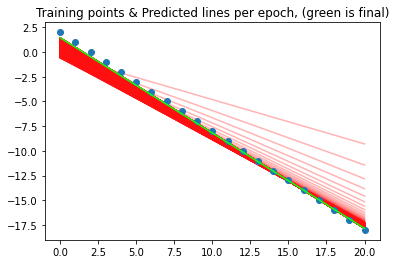

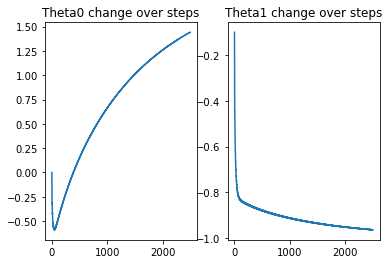

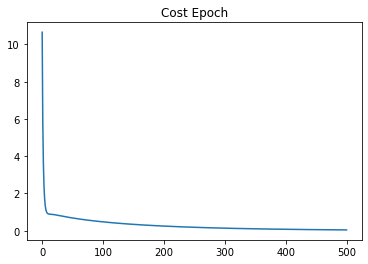

thetas predict: [ 1.44101633 -0.96394719]
thetas real: 2 -1


In [30]:
batchSize = 5
Epoch = 500
alpha = 0.1
eps = 0.0000001


(Thetavalues,costBatch,costEpoch,FinalH,thetaHistory0,thetaHistory1) = linearRegressionAdagrad(X,y,alpha,Epoch,batchSize,eps)

plt.plot([i for i in range(len(costEpoch))],costEpoch)
plt.title('Cost Epoch')
plt.show()

print('thetas predict:',Thetavalues[-1])
print('thetas real:',2,-1)


## RMSProp
updating the above code to implement RMSProp optimization

In [31]:
def gradientRMSProp(X,Y,lr, theta,Vtheta,epsilon,beta): #calculate gradient and take a step for all thetas  
    Vtheta[0] = beta*Vtheta[0] + (1-beta)*(sum(errorVector(X,Y,theta)) / len(Y))**2
    Vtheta[1] = beta*Vtheta[1] + (1-beta)*(sum(errorVector(X,Y,theta)*X) / len(Y))**2
    
    theta[0] -= (lr / (Vtheta[0]**(0.5)+epsilon))*(sum(errorVector(X,Y,theta)) / len(Y))
    theta[1] -= (lr / (Vtheta[1]**(0.5)+epsilon))*(sum(errorVector(X,Y,theta)*X) / len(Y))
        
def linearRegressionRMSProp(Xinput,Yinput,alpha,Epoch,batchSize,epsilon,beta):
    
    Xinput = np.array(Xinput)
    Yinput = np.array(Yinput)
    
    theta = [0,0]
    Vtheta = [0,0]
    
    thetaHistory = []
    Thetavalues = []
    costEpoch = []
    costBatch = []
    
    
    for i in range (Epoch):
        for dataIndex in range(0,len(Yinput),batchSize):
            #Split data into batches
            Y = np.array(Yinput[dataIndex:dataIndex+batchSize])
            X = np.array(Xinput[dataIndex:dataIndex+batchSize])
            gradientRMSProp(X,Y,alpha,theta,Vtheta,epsilon,beta)
            costBatch.append(cost(Xinput,Yinput,theta))
            Thetavalues.append(np.array(theta))
            thetaHistory.append(list(theta))
        costEpoch.append(cost(Xinput,Yinput,theta))
        #Draw predicted regression line
        xs = [min(Xinput),max(Xinput)]
        ys = [h(xs[0],theta) , h(xs[1],theta)]
        plt.plot(xs,ys,'#ff0f0f50')
    
    
    
    xs = [min(Xinput),max(Xinput)]
    ys = [h(xs[0],theta) , h(xs[1],theta)]
    plt.plot(xs,ys,'#0fff0fff',zorder=9999)
    plt.title('Training points & Predicted lines per epoch, (green is final)')
    
    print('RMSProp:')
    print("Final Cost: ", cost(Xinput,Yinput,theta))
    print('R2 Score:',r2_score(y,h(Xinput,theta)))
    
    plt.scatter(Xinput,Yinput,zorder=9999)
    plt.show()
    FinalH = h(Xinput,theta)

    thetaHistory0 = [x[0] for x in thetaHistory]
    thetaHistory1 = [x[1] for x in thetaHistory]
    fig,axis = plt.subplots(1,2)
    axis[0].plot(range(len(thetaHistory0)),thetaHistory0)
    axis[0].set_title('Theta0')
    axis[1].plot(range(len(thetaHistory1)),thetaHistory1)
    axis[1].set_title('Theta1')
    plt.show()
    
    
    return (Thetavalues,costBatch,costEpoch,FinalH,thetaHistory0,thetaHistory1)

RMSProp:
Final Cost:  0.007880544314477671
R2 Score: 0.9995701521283012


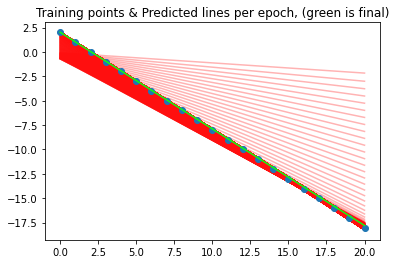

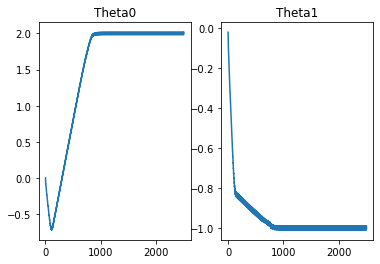

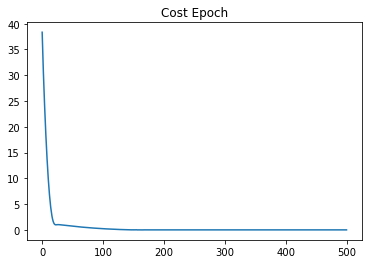

thetas predict: [ 2.01645135 -0.99048957]
thetas real: 2 -1


In [32]:
batchSize = 5
Epoch = 500
alpha = 0.01
eps = 0.0000001
beta = 0.8

(Thetavalues,costBatch,costEpoch,FinalH,thetaHistory0,thetaHistory1) = linearRegressionRMSProp(X,y,alpha,Epoch,batchSize,eps,beta)

plt.plot([i for i in range(len(costEpoch))],costEpoch)
plt.title('Cost Epoch')
plt.show()

print('thetas predict:',Thetavalues[-1])
print('thetas real:',2,-1)


## Adam
updating the above code to implement Adam optimization

In [33]:
def gradientAdam(X,Y,lr, theta,Vtheta,Mtheta,epsilon,beta1,beta2,t): #calculate gradient and take a step for all thetas 
    
    Mtheta[0] = beta1*Mtheta[0] + (1-beta1)*(sum(errorVector(X,Y,theta)) / len(Y))
    Mtheta[1] = beta1*Mtheta[1] + (1-beta1)*(sum(errorVector(X,Y,theta)*X) / len(Y))
    
    Vtheta[0] = beta2*Vtheta[0] + (1-beta2)*(sum(errorVector(X,Y,theta)) / len(Y))**2
    Vtheta[1] = beta2*Vtheta[1] + (1-beta2)*(sum(errorVector(X,Y,theta)*X) / len(Y))**2
    
    #BAIS CORRECTION
    Mtheta[0] /= 1-(beta1**t)
    Mtheta[1] /= 1-(beta1**t)
    Vtheta[0] /= 1-(beta2**t)
    Vtheta[1] /= 1-(beta2**t)
        
    theta[0] -= (lr / (Vtheta[0]**(0.5)+epsilon))*Mtheta[0]
    theta[1] -= (lr / (Vtheta[1]**(0.5)+epsilon))*Mtheta[1]
        
def linearRegressionAdam(Xinput,Yinput,alpha,Epoch,batchSize,epsilon,beta1,beta2):
    
    Xinput = np.array(Xinput)
    Yinput = np.array(Yinput)
    
    theta = [0,0]
    Mtheta = [0,0]
    Vtheta = [0,0]
    
    thetaHistory =[]
    Thetavalues = []
    costEpoch = []
    costBatch = []
    t = 1
    
    for i in range (Epoch):
        for dataIndex in range(0,len(Yinput),batchSize):
            #Split data into batches
            Y = np.array(Yinput[dataIndex:dataIndex+batchSize])
            X = np.array(Xinput[dataIndex:dataIndex+batchSize])
            gradientAdam(X,Y,alpha,theta,Vtheta,Mtheta,epsilon,beta1,beta2,t)
            t+=1 #counter for BAIS CORRECTION
            costBatch.append(cost(Xinput,Yinput,theta))
            Thetavalues.append(np.array(theta))
            thetaHistory.append(list(theta))
        costEpoch.append(cost(Xinput,Yinput,theta))
        #Draw predicted regression line
        xs = [min(Xinput),max(Xinput)]
        ys = [h(xs[0],theta) , h(xs[1],theta)]
        plt.plot(xs,ys,'#ff0f0f50')
    
    
    
    xs = [min(Xinput),max(Xinput)]
    ys = [h(xs[0],theta) , h(xs[1],theta)]
    plt.plot(xs,ys,'#0fff0fff',zorder=9999)
    plt.title('Training points & Predicted lines per epoch, (green is final)')
    
    print('Adam:')
    print("Final Cost: ", cost(Xinput,Yinput,theta))
    print('R2 Score:',r2_score(y,h(Xinput,theta)))
    #print('Y:',y)
    #print('Y^:',h(Xinput,theta))
    
    plt.scatter(Xinput,Yinput,zorder=9999)
    plt.show()
    
    thetaHistory0 = [x[0] for x in thetaHistory]
    thetaHistory1 = [x[1] for x in thetaHistory]
    fig,axis = plt.subplots(1,2)
    axis[0].plot(range(len(thetaHistory0)),thetaHistory0)
    axis[0].set_title('Theta0')
    axis[1].plot(range(len(thetaHistory1)),thetaHistory1)
    axis[1].set_title('Theta1')
    plt.show()
    
    FinalH = h(Xinput,theta)


    
    
    return (Thetavalues,costBatch,costEpoch,FinalH,thetaHistory0,thetaHistory1)

Adam:
Final Cost:  5.423801842905491e-05
R2 Score: 0.9999970415626311


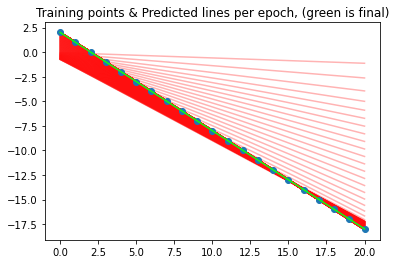

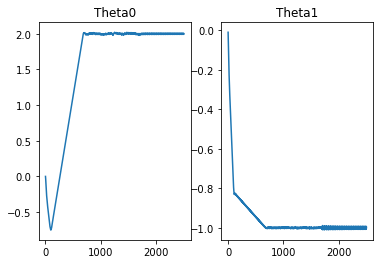

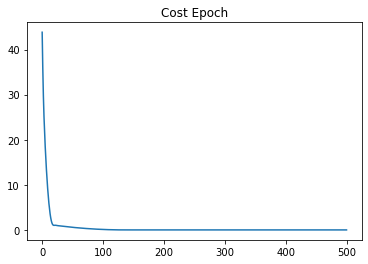

thetas predict: [ 2.00017949 -0.99912226]
thetas real: 2 -1


In [34]:
batchSize = 5
Epoch = 500
alpha = 0.01
eps = 0.0000001
beta1 = 0.8
beta2 = 0.8

(Thetavalues,costBatch,costEpoch,FinalH,thetaHistory0,thetaHistory1) = linearRegressionAdam(X,y,alpha,Epoch,batchSize,eps,beta1,beta2)

plt.plot([i for i in range(len(costEpoch))],costEpoch)
plt.title('Cost Epoch')
plt.show()

print('thetas predict:',Thetavalues[-1])
print('thetas real:',2,-1)

## Compatison
#### Now we're rerunning the 3 methods again but with the same hyperparameters to spot the differences. 

Adagrad:
Final Cost:  3.8247730951676835
R2 Score: 0.7913760129908536


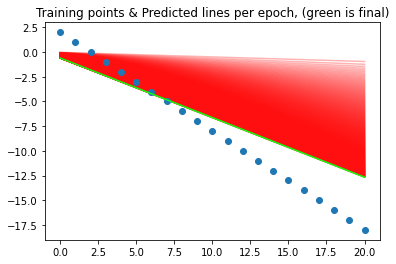

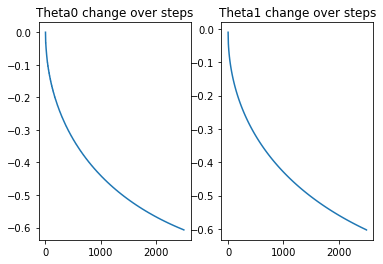

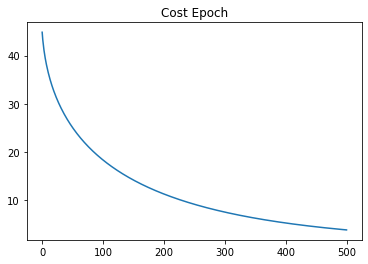

RMSProp:
Final Cost:  0.007880544314477671
R2 Score: 0.9995701521283012


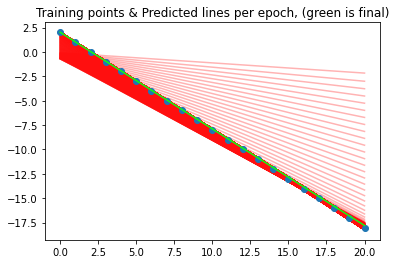

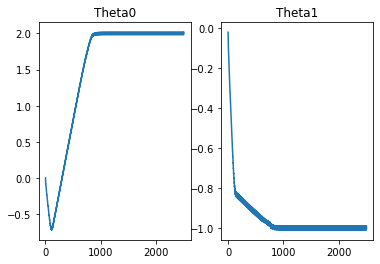

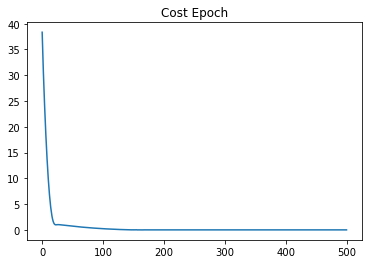

Adam:
Final Cost:  5.423801842905491e-05
R2 Score: 0.9999970415626311


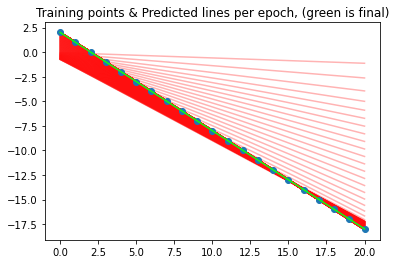

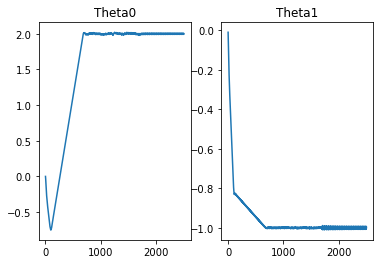

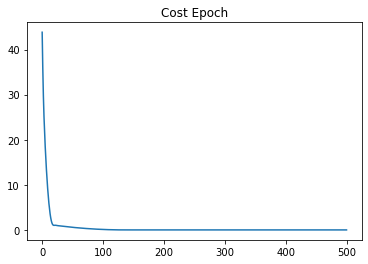

In [35]:
batchSize = 5
Epoch = 500
alpha = 0.01
eps = 0.0000001
beta = 0.8
beta1 = 0.8
beta2 = 0.8


#Adagrad
(Thetavalues,costBatch,costEpoch,FinalH,thetaHistory0,thetaHistory1) = linearRegressionAdagrad(X,y,alpha,Epoch,batchSize,eps)
plt.plot([i for i in range(len(costEpoch))],costEpoch)
plt.title('Cost Epoch')
plt.show()

#RMSProp
(Thetavalues,costBatch,costEpoch,FinalH,thetaHistory0,thetaHistory1) = linearRegressionRMSProp(X,y,alpha,Epoch,batchSize,eps,beta)
plt.plot([i for i in range(len(costEpoch))],costEpoch)
plt.title('Cost Epoch')
plt.show()

#ADAM
(Thetavalues,costBatch,costEpoch,FinalH,thetaHistory0,thetaHistory1) = linearRegressionAdam(X,y,alpha,Epoch,batchSize,eps,beta1,beta2)
plt.plot([i for i in range(len(costEpoch))],costEpoch)
plt.title('Cost Epoch')
plt.show()



## Hope you found it helpful :)